# Введение в машинное обучение

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('./data/cs-training.csv', sep=',')

In [4]:
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


## Описание данных

* SeriousDlqin2yrs - Person experienced 90 days past due delinquency or worse 
* RevolvingUtilizationOfUnsecuredLines - Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits
* age - Age of borrower in years
* NumberOfTime30-59DaysPastDueNotWorse - Number of times borrower has been 30-59 days past due but no worse in the last 2 years.
* DebtRatio - Monthly debt payments, alimony,living costs divided by monthy gross income
* MonthlyIncome - Monthly income
* NumberOfOpenCreditLinesAndLoans - Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)
* NumberOfTimes90DaysLate - Number of times borrower has been 90 days or more past due.
* NumberRealEstateLoansOrLines - Number of mortgage and real estate loans including home equity lines of credit
* NumberOfTime60-89DaysPastDueNotWorse - Number of times borrower has been 60-89 days past due but no worse in the last 2 years.
* NumberOfDependents - Number of dependents in family excluding themselves (spouse, children etc.)

* SeriousDlqin2yrs - Флаг выхода на просрочку через 90 дней
* RevolvingUtilizationOfUnsecuredLines - Общий баланс по кредитным картам и личным кредитным линиям, за исключением недвижимости, и без задолженности по кредитам, таким как автокредиты, деленные на сумму кредитных лимитов
* age - Возраст заемщика в годах
* NumberOfTime30-59DaysPastDueNotWorse - Сколько раз заемщик просрочил выплату не более, чем на 30-59 дней, за последние 2 года.
* DebtRatio - Ежемесячные платежи по долгам, алименты, прожиточные расходы, деленные на месячный валовый доход
* MonthlyIncome - Ежемесячный доход
* NumberOfOpenCreditLinesAndLoans - Количество открытых кредитов (рассрочка, например, автокредит или закладная) и кредитные линии (например, кредитные карты)
* NumberOfTimes90DaysLate - Сколько раз заемщик просрочил выплату на 90 дней и более.
* NumberRealEstateLoansOrLines - Количество ипотечных кредитов и кредитов на недвижимость
* NumberOfTime60-89DaysPastDueNotWorse - Сколько раз заемщик просрочил выплату не более, чем на 60-89 дней, за последние 2 года.
* NumberOfDependents - Количество иждивенцев в семье, исключая себя (супруга, дети и т.д.)

# Подготавливаем выборку

Для простоты убираем все отсутствующие признаки из dataset'a

In [5]:
df = df.dropna()

In [6]:
X = df.as_matrix(columns=df.columns[1:])

In [7]:
y = df.as_matrix(columns=df.columns[:1])
y = y.reshape(y.shape[0])

### В качестве моделей будем использовать DecisionTreeClassifier и RandomForestClassifier

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [9]:
from sklearn.metrics import accuracy_score

In [10]:
from sklearn.model_selection import KFold

In [11]:
gkf = KFold(n_splits=5, shuffle=True)

In [12]:
# clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=0)
clf = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)

In [13]:
for train, test in gkf.split(X, y):
    X_train, y_train = X[train], y[train]
    X_test, y_test = X[test], y[test]
    
    clf.fit(X_train, y_train)
    
    print(accuracy_score(y_pred=clf.predict(X_test), y_true=y_test))

0.933399850337
0.928327928827
0.930198719548
0.931196474599
0.931193614102


# Feature importances

In [14]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

Feature ranking:
1. feature 0	(0.1845413385885917), RevolvingUtilizationOfUnsecuredLines
2. feature 3	(0.17693668318839045), DebtRatio
3. feature 4	(0.16235524194167955), MonthlyIncome
4. feature 1	(0.12069992663154308), age
5. feature 6	(0.11235741565117792), NumberOfTimes90DaysLate
6. feature 5	(0.08917016662238694), NumberOfOpenCreditLinesAndLoans
7. feature 9	(0.04553950592743727), NumberOfDependents
8. feature 2	(0.04283715158788432), NumberOfTime30-59DaysPastDueNotWorse
9. feature 7	(0.035362709517649644), NumberRealEstateLoansOrLines
10. feature 8	(0.03019986034325909), NumberOfTime60-89DaysPastDueNotWorse


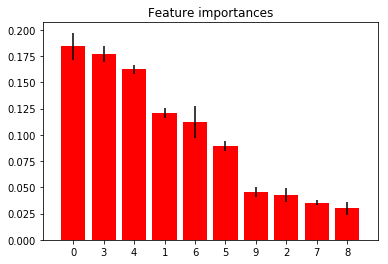

In [15]:
print("Feature ranking:")

for f in range(X.shape[1]):
    print("{}. feature {}\t({}), {}".format(f + 1, indices[f], importances[indices[f]], df.columns[indices[f]+1]))

plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()